In [1]:
import sys
sys.path.append('/Users/lei/home/studyhall/smart-earth-sensing/machine-fac-project/lib')
 
import torch 
import torch.nn as nn
 
from tqdm import tqdm 
import pickle
import numpy as np
from matplotlib import pyplot as plt 
 
import platform 
from collections import OrderedDict
 
from preprocessing import * 
from python_speech_features import mfcc
from h5reader import read_data 
from visualize import examine 

In [2]:
sr = 2000
with open('../data/abnormal_raw_1920.pkl', 'rb') as f:
    abnormal_raw = pickle.load(f) 
with open('../data/normal_raw_1920.pkl', 'rb') as f:
    normal_raw = pickle.load(f) 

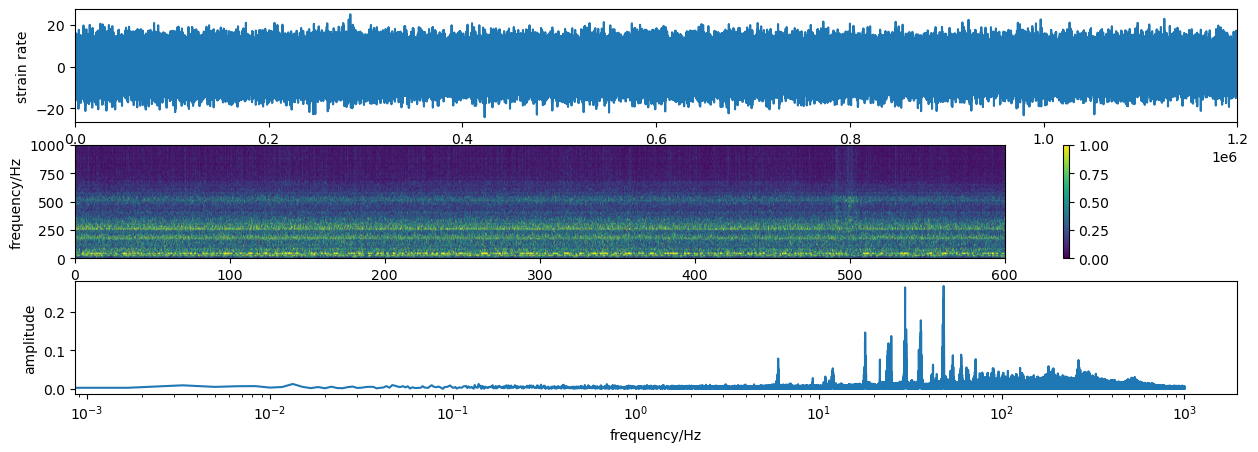

0

In [4]:
examine(normal_raw, 2000, 0, 1, 1000)
 

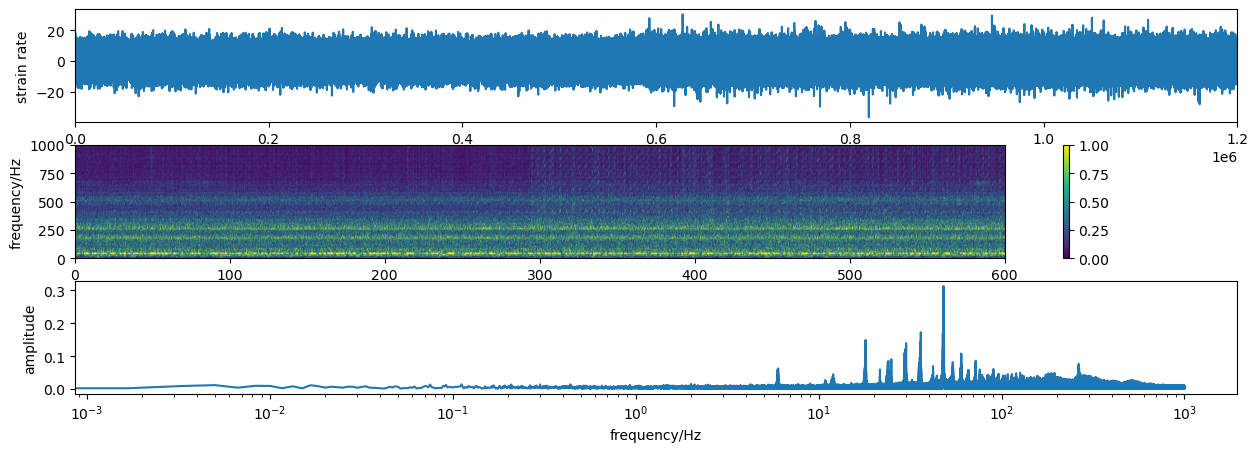

0

In [5]:
examine(abnormal_raw, 2000, 0, 1, 1000)

In [21]:
path = '/Users/lei/home/studyhall/smart-earth-sensing/machine-fac-project/pk_files/sound_sample33.pkl'
with open(path, 'rb') as f:
    y = pickle.load(f)
np.shape(y)

(23576000, 1)

In [3]:
y_mfcc = mfcc(y, 8000)
y_mfcc = np.swapaxes(y_mfcc, 0, 1) 
print(np.shape(y)) 
print(np.shape(y_mfcc))
 

(23576000, 1)
(13, 294699)


/var/folders/0v/r030dv3s4tn1pl2pq7k7ywcw0000gn/T/ipykernel_33042/735868017.py:2: UserWarning: shading value 'gourand' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(y_mfcc, cmap='hot', shading="gourand")


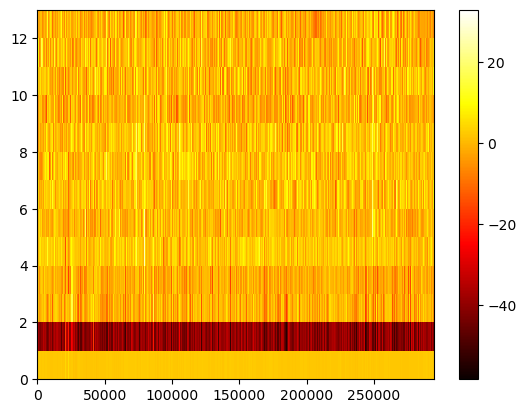

In [4]:
# plt.imshow(y_mfcc, cmap='hot', interpolation='nearest', origin='lower') 
plt.pcolormesh(y_mfcc, cmap='hot', shading="gourand") 
plt.colorbar() 
plt.show() 

In [10]:
y = torch.rand(200, 1) 
X = torch.rand(200, 1, 200, 50) 
batch_size = 4 

In [9]:
def train(data_loader, num_epochs, optimizer, criterion, model):
    for e in range(num_epochs):
        running_loss = 0.0 
        for i, (xs, ys) in enumerate(data_loader, 0):
            optimizer.zero_grad()
            y_hats = cnn(xs)
            loss = criterion(y_hats, ys) 
            loss.backward() 
            optimizer.step() 
            running_loss += loss.item()
            if i % 1000 == 999:    
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                running_loss = 0.0 
 

tensor([[1., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])